In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
name=['start_date',"end_date","category","start_loc","end_loc","distance","purpose"]

In [ ]:
df=pd.read_csv("My Uber Drives - 2016.csv",names=name,skiprows=[0])

In [ ]:
df.head()

,start_date,end_date,category,start_loc,end_loc,distance,purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_date  1156 non-null   object 
 1   end_date    1155 non-null   object 
 2   category    1155 non-null   object 
 3   start_loc   1155 non-null   object 
 4   end_loc     1155 non-null   object 
 5   distance    1156 non-null   float64
 6   purpose     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# EDA
1.Handling Missing values


In [ ]:
#TO check null values
df.isnull().sum()/len(df)*100

start_date     0.000000
end_date       0.086505
category       0.086505
start_loc      0.086505
end_loc        0.086505
distance       0.000000
purpose       43.512111
dtype: float64

In [ ]:
df['purpose']=df['purpose'].fillna("unknown")

In [ ]:
#Dropping rows having null values less than 4%
df.dropna(inplace=True)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.isnull().sum()/len(df)*100

start_date    0.0
end_date      0.0
category      0.0
start_loc     0.0
end_loc       0.0
distance      0.0
purpose       0.0
dtype: float64

In [ ]:
#separating  numerical and catgorical Columns

In [ ]:
#numerical columns
num_col=df.select_dtypes(include=['int','float']).columns
num_col

Index(['distance'], dtype='object')

In [ ]:
#Catgorical columns
cat_col=df.select_dtypes(include=['O']).columns
cat_col

Index(['start_date', 'end_date', 'category', 'start_loc', 'end_loc',
       'purpose'],
      dtype='object')

In [ ]:
df["start_date"]=pd.to_datetime(df['start_date'],format="%m/%d/%Y %H:%M")

In [ ]:
df["end_date"]=pd.to_datetime(df['end_date'],format="%m/%d/%Y %H:%M")

In [ ]:
df.head()

,start_date,end_date,category,start_loc,end_loc,distance,purpose,Hour,Month,Dayofweek
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,unknown,1,1,5
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,1,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,1,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,1,2


In [ ]:
df['Dayofweek'].unique()

array([4, 5, 1, 2, 3, 6, 0])

In [ ]:
df['Hour']=df['start_date'].map(lambda time:time.hour)

In [ ]:
df['Month']=df['start_date'].map(lambda time:time.month)

In [ ]:
df['Dayofweek']=df['start_date'].map(lambda time:time.dayofweek)

In [ ]:
map_dict={0:"Mon",1:"Tues",2:"Wed",3:"Thur",4:"Fri",5:"Sat",6:"Sun"}

In [ ]:
df['Dayofweek']=df['Dayofweek'].map(map_dict)

In [ ]:
month_dict={1:"Jan",2:"Feb",3:"mar",4:"April",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sept",10:"Oct",11:"Nov",12:"Dec"}

In [ ]:
df['Month']=df['Month'].map(month_dict)

In [ ]:
df.head()

,start_date,end_date,category,start_loc,end_loc,distance,purpose,Hour,Month,Dayofweek,Duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Jan,Fri,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,unknown,1,Jan,Sat,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Jan,Sat,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Jan,Tues,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Jan,Wed,0 days 01:07:00


In [ ]:
df['Duration']=df['end_date']-df['start_date']

In [ ]:
df['Duration']=df['Duration'].astype("str")

In [ ]:
df['Duration']=df['Duration'].map(lambda x:x[7:])

In [ ]:
df.head()

,start_date,end_date,category,start_loc,end_loc,distance,purpose,Hour,Month,Dayofweek,Duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Jan,Fri,00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,unknown,1,Jan,Sat,00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Jan,Sat,00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Jan,Tues,00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Jan,Wed,01:07:00


<Axes: xlabel='category', ylabel='count'>

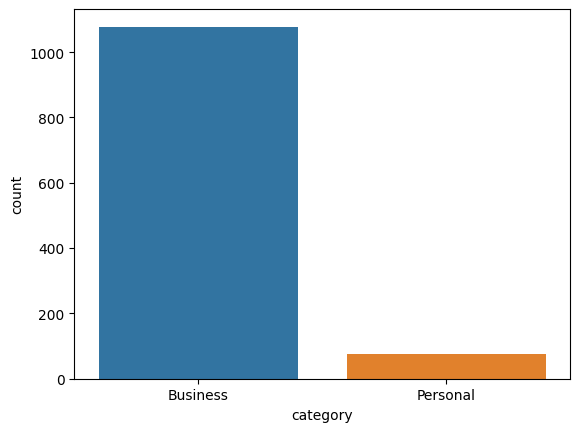

In [ ]:
# 1.Frequency of riders with respect to cat?
sns.countplot(x=df['category'])

In [ ]:
#Most of the people are from Business Class.

<Axes: xlabel='count', ylabel='purpose'>

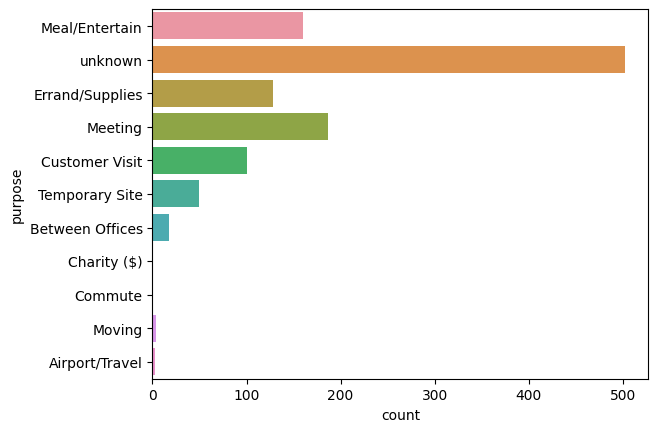

In [ ]:
# Different Purpose
sns.countplot(y=df['purpose'])

In [ ]:
#Most of the people take uber ride for meeting purpose.

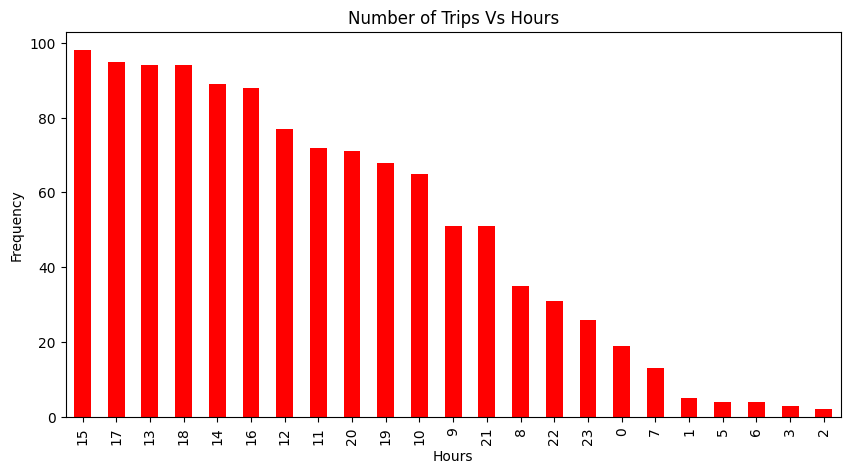

In [ ]:
#What is the time of a day the user rides an uber the most?
df['Hour'].value_counts().plot(kind="bar",color="red",figsize=(10,5))
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("Number of Trips Vs Hours")
plt.show()

In [ ]:
#Most of the users Travels during lunch hours and evening more than rest of the day,
#so that most of the meeting occur frequently between 1 Pm -5 pm.

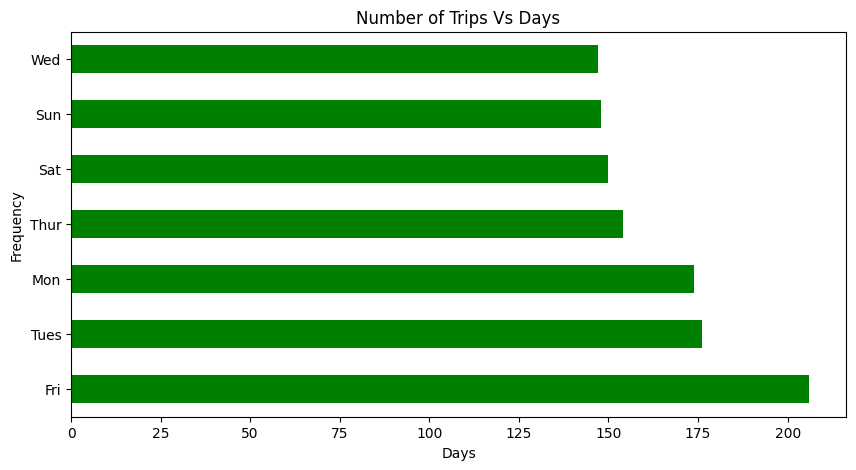

In [ ]:
#most busiest day of week
df['Dayofweek'].value_counts().plot(kind="barh",color="green",figsize=(10,5))
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.title("Number of Trips Vs Days")
plt.show()

In [ ]:
#User Travels almost on every day of week,but travels more on friday.

##Busiest Month(monthwise distribution of uber trips)

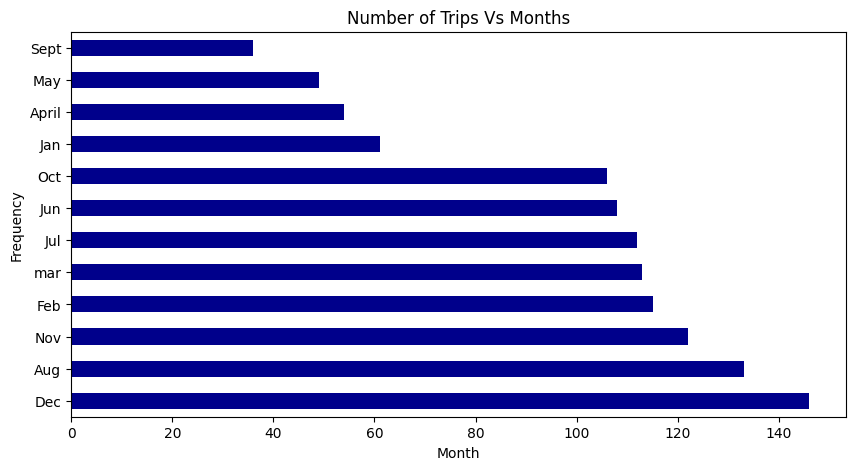

In [ ]:
df['Month'].value_counts().plot(kind="barh",color="darkblue",figsize=(10,5))
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.title("Number of Trips Vs Months")
plt.show()

In [ ]:
#Most of the rides are in Dec 2016.

In [ ]:
dec_data=df[df['Month']=="Dec"]['Dayofweek'].value_counts()

<Axes: >

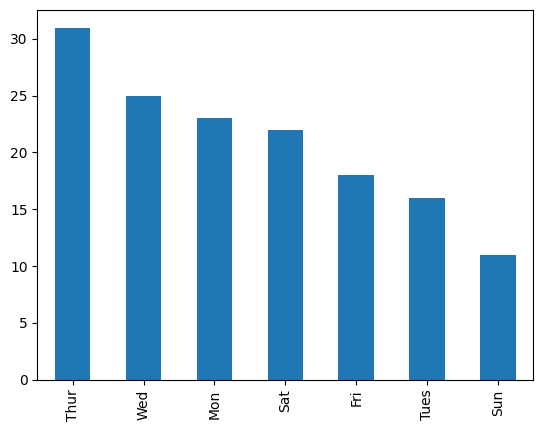

In [ ]:
dec_data.plot(kind="bar")

<Axes: >

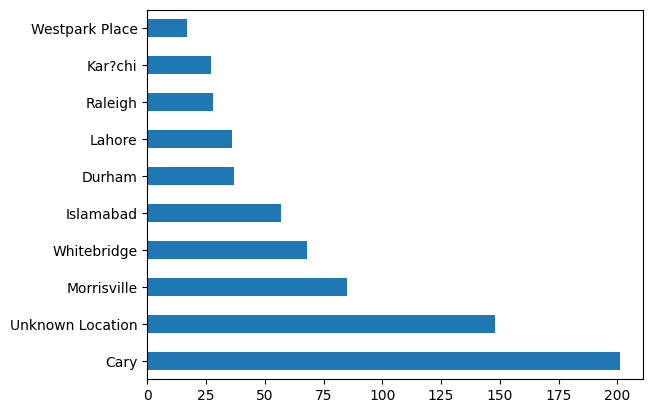

In [ ]:
top_10_pickup_loc=df['start_loc'].value_counts()[:10]
top_10_pickup_loc.plot(kind="barh")


<Axes: >

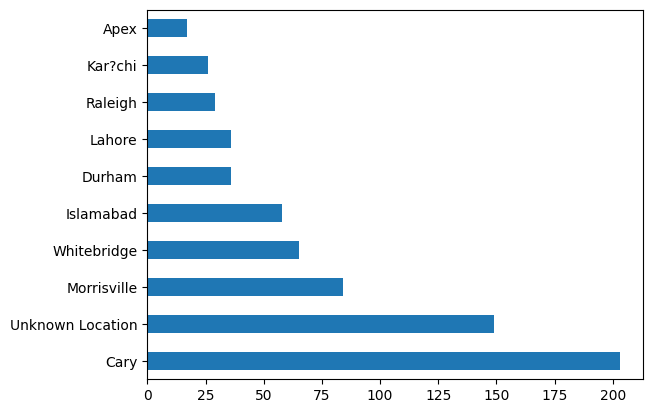

In [ ]:
top_10_end_loc=df['end_loc'].value_counts()[:10]
top_10_end_loc.plot(kind="barh")

In [ ]:
# Number of request for pick up are from Cary

<Axes: xlabel='distance', ylabel='Density'>

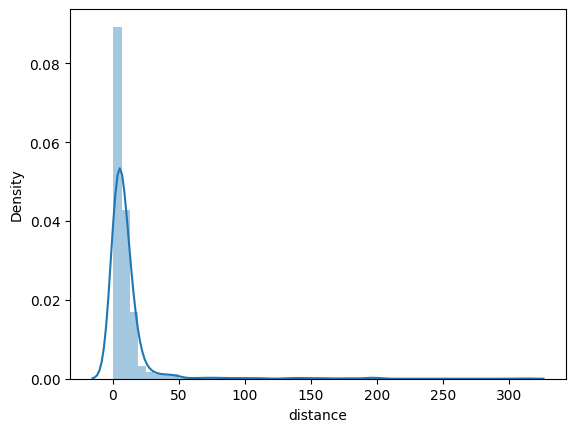

In [ ]:
sns.distplot(df['distance'])